In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd


In [3]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
df = pd.read_csv(DATA_URL + "video_games_sales.csv").dropna()

In [5]:
print(df.shape)

(6825, 16)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [7]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [8]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


<Axes: xlabel='Year_of_Release'>

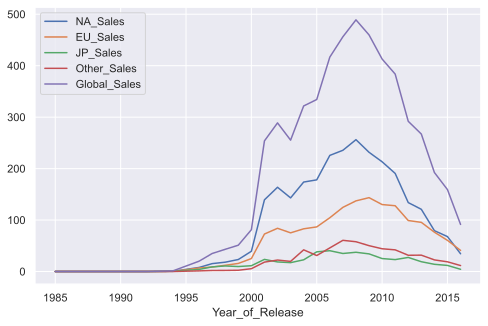

In [10]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release").sum().plot()

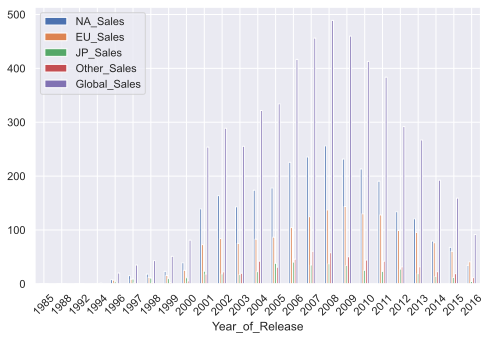

In [11]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45);

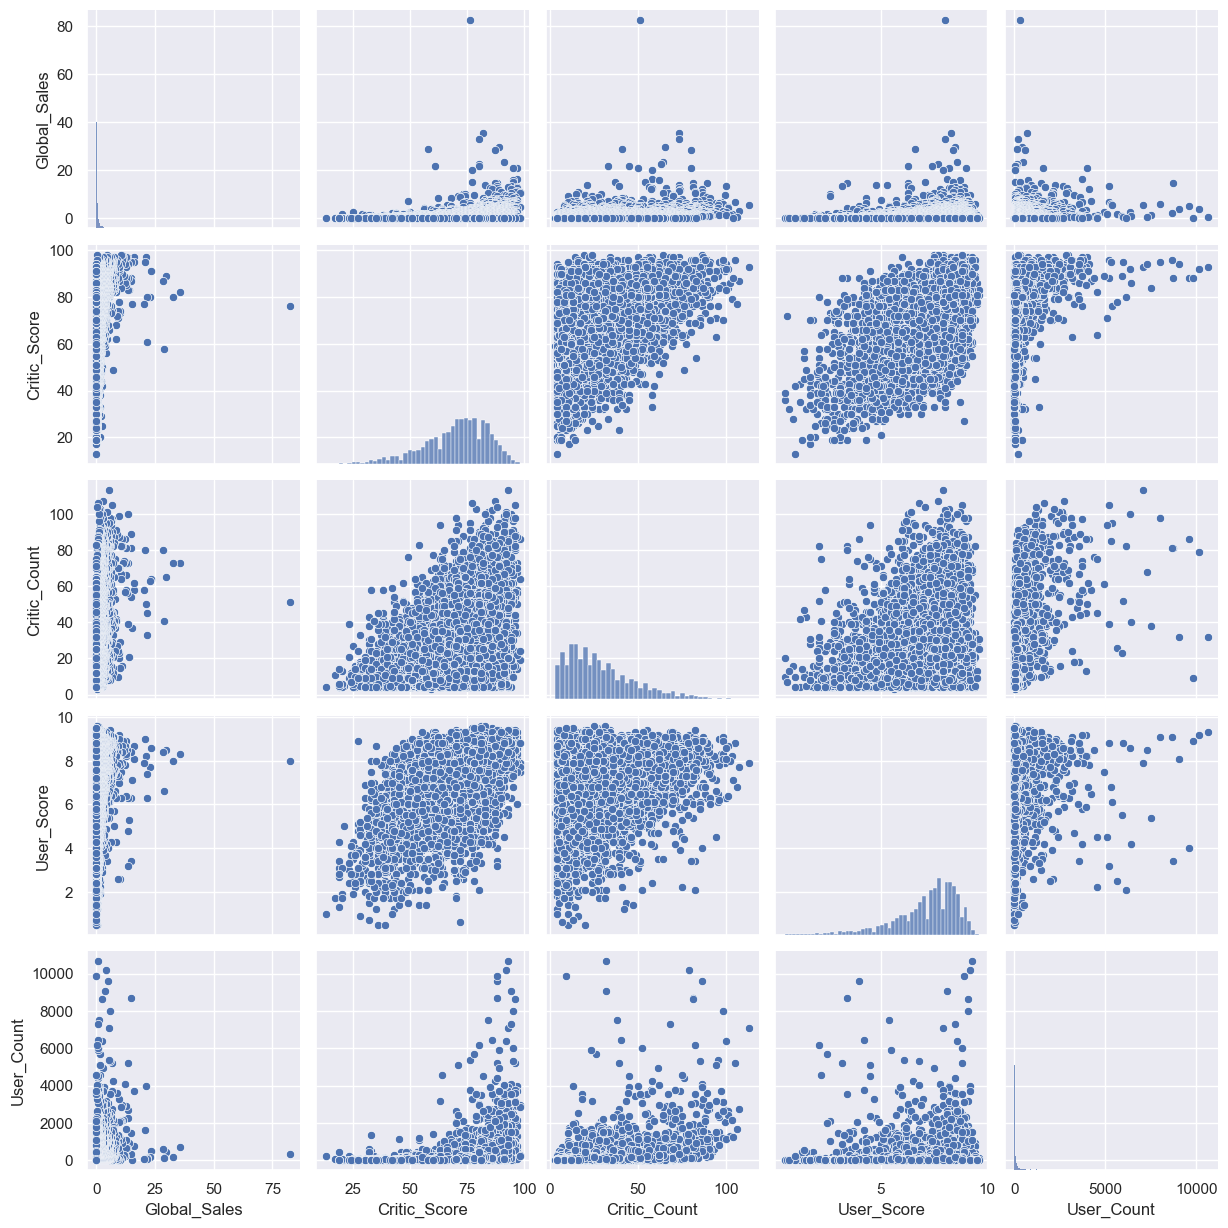

In [14]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[["Global_Sales", "Critic_Score", "Critic_Count","User_Score", "User_Count"]])

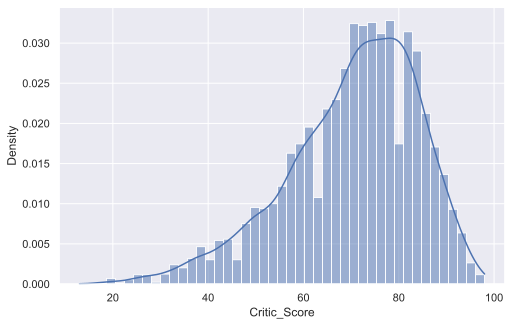

In [15]:
%config InlineBackend.figure_format = 'svg'
sns.histplot(df["Critic_Score"], kde=True, stat="density");

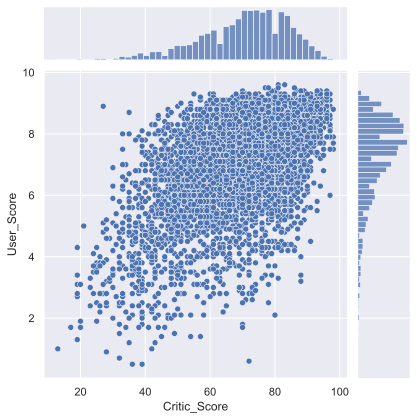

In [16]:
sns.jointplot(x="Critic_Score", y="User_Score", data=df, kind="scatter");


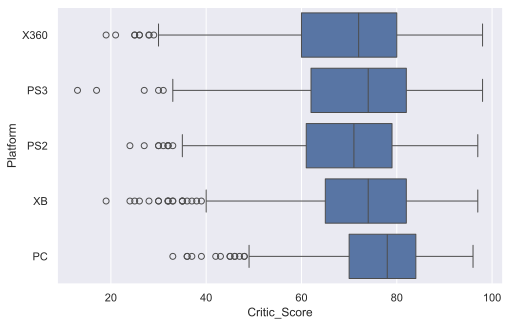

In [17]:
top_platforms = (
    df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=df[df["Platform"].isin(top_platforms)],
    orient="h",
);

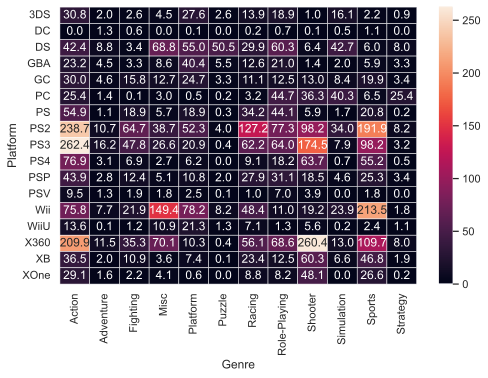

In [18]:
platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc="sum"
    )
    .fillna(0)
    .map(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);

In [27]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from IPython.display import display, IFrame

init_notebook_mode(connected=True)

def plotly_depict_figure_as_iframe(fig, title="", width=800, height=500,
  plot_path='./plotly_htmls/'):
  """
  This is a helper method to visualizae PLotly plots as Iframes in a Jupyter book.
  If you are running `jupyter-notebook`, you can just use iplot(fig).
  """

  # in a Jupyter Notebook, the following should work
  #iplot(fig, show_link=False)

  # in a Jupyter Book, we save a plot offline and then render it with IFrame
  fig_path_path = f"{plot_path}/{title}.html"
  plot(fig, filename=fig_path_path, show_link=False, auto_open=False);
  display(IFrame(fig_path_path, width=width, height=height))

In [28]:
years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

In [30]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(x=years_df.index, y=years_df["Global_Sales"], name="Global Sales")

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index, y=years_df["Number_of_Games"], name="Number of games released"
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {"title": "Statistics for video games"}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)

# in a Jupyter Notebook, the following should work
#iplot(fig, show_link=False)

# in a Jupyter Book, we save a plot offline and then render it with IFrame
plotly_depict_figure_as_iframe(fig, title="topic2_part2_plot1")

In [31]:
# Do calculations and prepare the dataset
platforms_df = (
    df.groupby("Platform")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Platform")[["Name"]].count())
)
platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

In [32]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index, y=platforms_df["Global_Sales"], name="Global Sales"
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df["Number_of_Games"],
    name="Number of games released",
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {"title": "Market share by gaming platform"}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
# in a Jupyter Notebook, the following should work
#iplot(fig, show_link=False)

# in a Jupyter Book, we save a plot offline and then render it with IFrame
plotly_depict_figure_as_iframe(fig, title="topic2_part2_plot2")

In [33]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))

# Visualize
# in a Jupyter Notebook, the following should work
#iplot(data, show_link=False)

# in a Jupyter Book, we save a plot offline and then render it with IFrame
plotly_depict_figure_as_iframe(data, title="topic2_part2_plot3")